link to dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer    # sklearn: library for ML
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib

# Data Loading and Understanding

In [4]:
df = pd.read_csv('/content/diabetes.csv')

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print(df.describe())    # remember this

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Data Cleaning and Preprocessing

In [ ]:
# # cleaning the dataset
# # Replacing 0 with NaN in the specific column

# df['Glucose'] = df['Glucose'].mask(df['Glucose'].eq(0), pd.NA)
# df['BloodPressure'] = df['BloodPressure'].mask(df['BloodPressure'].eq(0), pd.NA)
# df['SkinThickness'] = df['SkinThickness'].mask(df['SkinThickness'].eq(0), pd.NA)
# df['Insulin'] = df['Insulin'].mask(df['Insulin'].eq(0), pd.NA)
# df['BMI'] = df['BMI'].mask(df['BMI'].eq(0), pd.NA)

In [11]:
import numpy as np

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    df[column] = np.where(df[column] == 0, pd.NA, df[column])
    # here 1st parameter is the condition; 2nd is the value to be used if the condition is True; 3rd is the value to be used if the condition is False.

In [10]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [16]:
# replacing missing values with mean

df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


# Data Visualization

Text(0, 0.5, 'Count')

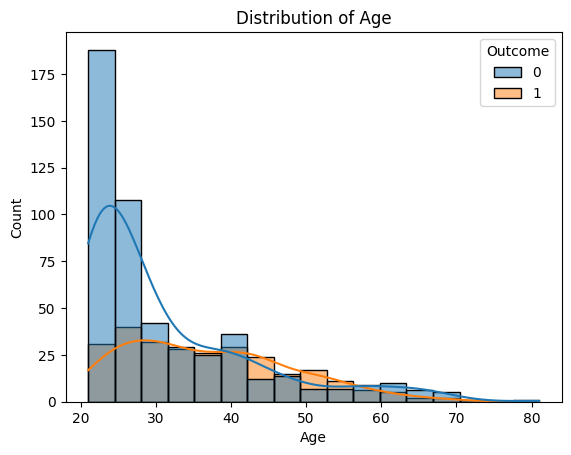

In [31]:
# Visualize the distribution of age among patients with and without Diabetes
# plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Age', hue='Outcome', kde=True)
# bars will be color-coded based on the values in the 'Outcome' column
# KDE is a smoothed representation of the data distribution

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.show()

In [35]:
df_diabetes = df[df['Outcome'] == 1]    # selecting only those records of people who have diabetes
print(df_diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
4            0    137.0           40.0       35.00000  168.000000  43.1   
6            3     78.0           50.0       32.00000   88.000000  31.0   
8            2    197.0           70.0       45.00000  543.000000  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1  


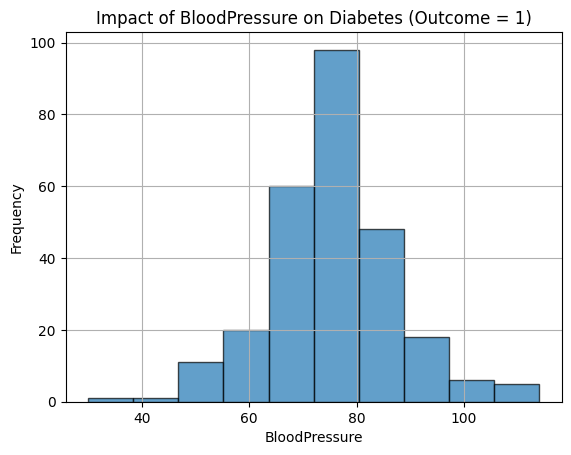

In [45]:
# Create histogram for the BloodPressure attribute for the filtered rows
# plt.figure(figsize=(8, 6))
plt.hist(df_diabetes['BloodPressure'], bins=10, edgecolor='black', alpha=0.7)
# alpha controls the transparency of the bars
plt.title('Impact of BloodPressure on Diabetes (Outcome = 1)')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

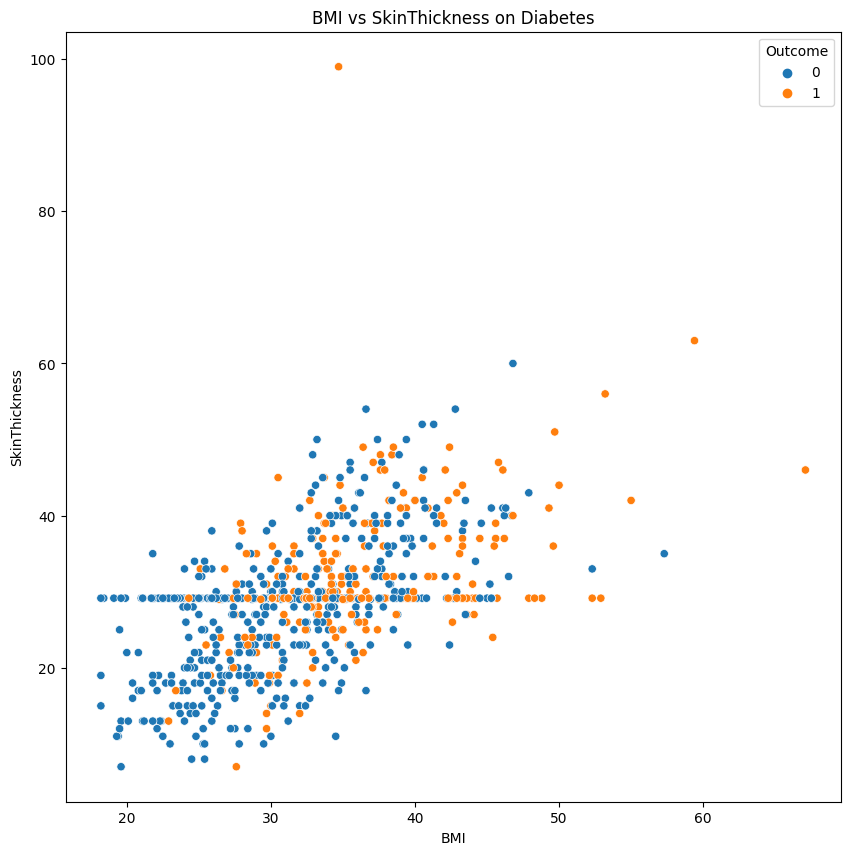

In [49]:
# Visualize the relationship between BMI and SkinThickness rate achieved
plt.figure(figsize=(10, 10))
sns.scatterplot(x='BMI', y='SkinThickness', hue='Outcome', data=df)
plt.title('BMI vs SkinThickness on Diabetes')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.show()

The graph also shows that people with diabetes tend to have higher BMI and skin thickness than people without diabetes. This suggests that BMI and skin thickness may be risk factors for diabetes.



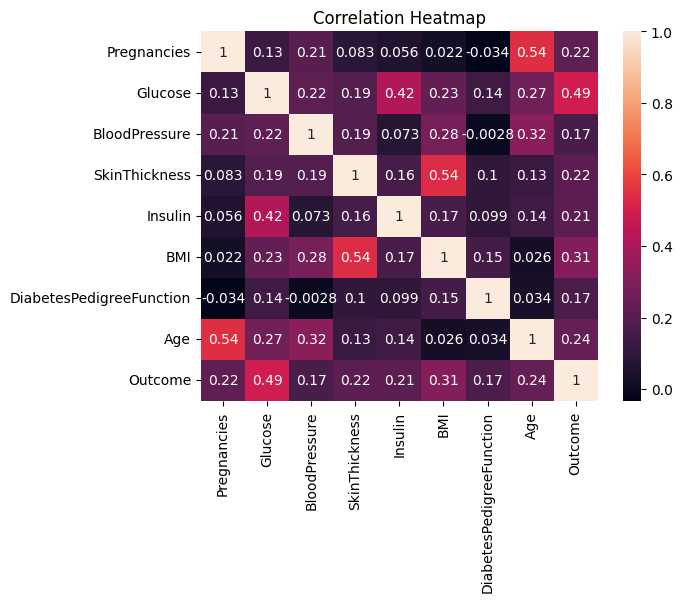

In [55]:
# Visualize the correlation between variables using a heatmap
# plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, )
plt.title('Correlation Heatmap')
plt.show()

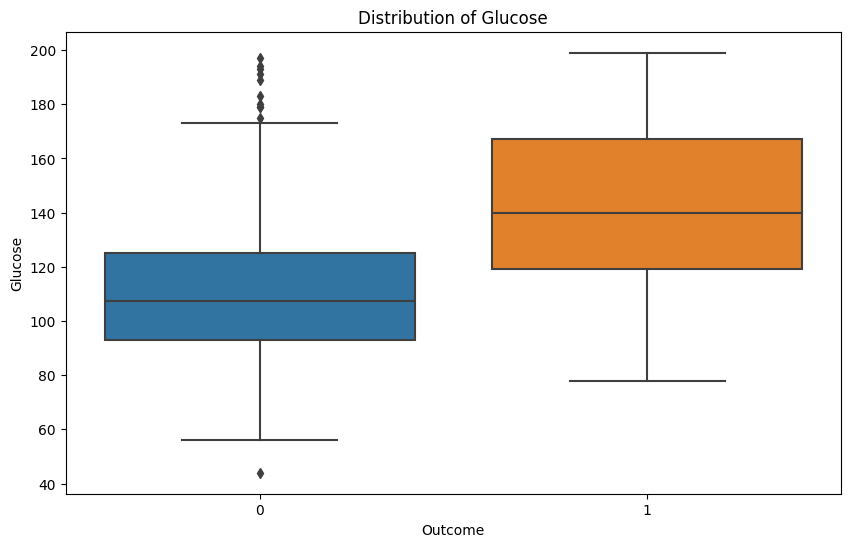

In [ ]:
# Visualize the distribution of Glucose among patients with and without Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)    # note this
plt.title('Distribution of Glucose')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

The horizontal line in the middle of the box represents the median glucose level, which is the value that divides the population in half. The top and bottom of the box represent the 25th and 75th quartiles, respectively. The whiskers extend to the highest and lowest values that are still within 1.5 times the interquartile range (IQR) of the middle 50% of the data.